### CONFIDENCE INTERVAL
---

### Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### Reading data

In [2]:
ms = pd.read_csv("../data/microsoft.csv")

In [3]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


### Average stock return

In [4]:
ms["log_return"] = np.log(ms["Close"].shift(-1)) - np.log(ms["Close"])

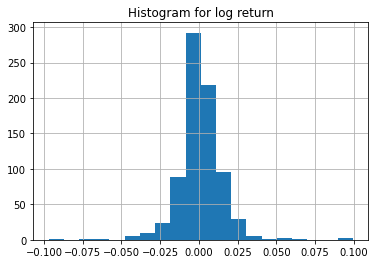

In [5]:
ms["log_return"].hist(bins=20)
plt.title("Histogram for log return")
plt.show()

In [7]:
sample_size = ms["log_return"].shape[0]
sample_mean = ms["log_return"].mean()
sample_std = ms["log_return"].std(ddof=1)
print("Sample size: {0}".format(sample_size))
print("Sample mean: {0}".format(sample_mean))
print("Sample SD: {0}".format(sample_std))

Sample size: 780
Sample mean: 0.0008202314861230223
Sample SD: 0.014191897388737506


In [8]:
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

interval_left = sample_mean + z_left*sample_std
interval_right = sample_mean + z_right*sample_std
print("80% confidence interval is")
print("{0} | {1}".format(interval_left, interval_right))

80% confidence interval is
-0.017367416830461856 | 0.0190078798027079


In [17]:
left_limit = norm.ppf(0.10, sample_mean, sample_std)
right_limit = norm.ppf(0.90, sample_mean, sample_std)
print("80% confidence interval is")
print("{0} | {1}".format(left_limit, right_limit))

80% confidence interval is
-0.017367416830461856 | 0.0190078798027079


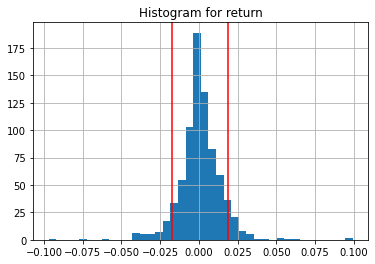

In [22]:
ms["log_return"].hist(bins=40)
plt.axvline(x = left_limit, color = 'r')
plt.axvline(x = right_limit, color = 'r')
plt.title("Histogram for return")
plt.show()